In [1]:
# multivariate multi-step encoder-decoder lstm 
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
# # define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
# print(dataset)

In [4]:
df = pd.read_csv('dasatest.csv')
# print(df.head())
df['Month'] = pd.to_datetime(df.Month , format = '%d/%m/%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
# print(df.head())
cols = data.columns
dataset = data[cols].astype(float)
dataset = np.array(dataset)
print(dataset)

[[0.1543245  0.11970796 0.17823648 ... 0.46352725 1.64151026 0.30708925]
 [0.12290076 0.11983117 0.16549748 ... 0.57131545 1.64993684 0.45160385]
 [0.12758278 0.11297011 0.19075444 ... 0.64402526 2.11044938 0.44806313]
 ...
 [0.37375369 0.34499689 0.40026859 ... 1.20782415 1.77394841 0.81705893]
 [0.3336417  0.30050302 0.36040647 ... 1.1479989  1.64021404 0.75481252]
 [0.24217588 0.21514682 0.33592286 ... 0.76868481 1.48927726 0.54231719]]


In [5]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler = scaler.fit(dataset)
# dataset_scaled = scaler.transform(dataset)
# print(dataset_scaled)

In [71]:
# choose a number of time steps
n_steps_in, n_steps_out = 36, 15
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
print(X.shape,y.shape)

(22, 36, 3915) (22, 15, 3915)


In [72]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(36, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50)                793200    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 15, 50)           0         
 or)                                                             
                                                                 
 lstm_17 (LSTM)              (None, 15, 36)            12528     
                                                                 
 time_distributed_8 (TimeDis  (None, 15, 3915)         144855    
 tributed)                                                       
                                                                 
Total params: 950,583
Trainable params: 950,583
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 438197.0625 - val_loss: 647042.0000
Epoch 2/500
1/1 [==============================] - 1s 559ms/step - loss: 468427.3125 - val_loss: 710892.5625
Epoch 3/500
1/1 [==============================] - 0s 335ms/step - loss: 499383.9375 - val_loss: 727502.1250
Epoch 4/500
1/1 [==============================] - 0s 268ms/step - loss: 504174.7500 - val_loss: 765191.8125
Epoch 5/500
1/1 [==============================] - 0s 216ms/step - loss: 469285.4688 - val_loss: 810023.8125
Epoch 6/500
1/1 [==============================] - 0s 216ms/step - loss: 492570.7188 - val_loss: 831160.4375
Epoch 7/500
1/1 [==============================] - 0s 268ms/step - loss: 486113.4062 - val_loss: 840234.8125
Epoch 8/500
1/1 [==============================] - 0s 248ms/step - loss: 486700.8125 - val_loss: 859942.3125
Epoch 9/500
1/1 [==============================] - 0s 309ms/step - loss: 506471.0625 - val_loss: 882963.8750
Epoch 10/500
1/1 [====

1/1 [==============================] - 0s 203ms/step - loss: 459206.3125 - val_loss: 1011292.8750
Epoch 76/500
1/1 [==============================] - 0s 196ms/step - loss: 467738.1562 - val_loss: 1020957.6250
Epoch 77/500
1/1 [==============================] - 0s 204ms/step - loss: 444043.1875 - val_loss: 1026112.1875
Epoch 78/500
1/1 [==============================] - 0s 197ms/step - loss: 439854.2188 - val_loss: 1023422.5000
Epoch 79/500
1/1 [==============================] - 0s 212ms/step - loss: 486230.2500 - val_loss: 999040.6250
Epoch 80/500
1/1 [==============================] - 0s 249ms/step - loss: 451795.4062 - val_loss: 998585.6875
Epoch 81/500
1/1 [==============================] - 0s 372ms/step - loss: 459798.1875 - val_loss: 992655.3750
Epoch 82/500
1/1 [==============================] - 0s 314ms/step - loss: 468816.2812 - val_loss: 1009155.6250
Epoch 83/500
1/1 [==============================] - 0s 196ms/step - loss: 472915.3125 - val_loss: 1032536.8125
Epoch 84/500
1/1 

1/1 [==============================] - 0s 196ms/step - loss: 447769.5938 - val_loss: 1016957.1875
Epoch 149/500
1/1 [==============================] - 0s 207ms/step - loss: 435790.7500 - val_loss: 1006120.8750
Epoch 150/500
1/1 [==============================] - 0s 216ms/step - loss: 419360.7500 - val_loss: 994137.8125
Epoch 151/500
1/1 [==============================] - 0s 224ms/step - loss: 428483.9375 - val_loss: 988401.1875
Epoch 152/500
1/1 [==============================] - 0s 200ms/step - loss: 426295.9688 - val_loss: 993680.0000
Epoch 153/500
1/1 [==============================] - 0s 224ms/step - loss: 432297.5000 - val_loss: 986889.1250
Epoch 154/500
1/1 [==============================] - 0s 218ms/step - loss: 429691.3750 - val_loss: 997168.3125
Epoch 155/500
1/1 [==============================] - 0s 200ms/step - loss: 428933.4688 - val_loss: 1009346.0000
Epoch 156/500
1/1 [==============================] - 0s 192ms/step - loss: 415198.0000 - val_loss: 1001421.0000
Epoch 157/5

Epoch 222/500
1/1 [==============================] - 0s 184ms/step - loss: 426516.9062 - val_loss: 934355.1875
Epoch 223/500
1/1 [==============================] - 0s 192ms/step - loss: 423322.6875 - val_loss: 951241.8125
Epoch 224/500
1/1 [==============================] - 0s 204ms/step - loss: 421531.4688 - val_loss: 943079.1250
Epoch 225/500
1/1 [==============================] - 0s 188ms/step - loss: 415064.0000 - val_loss: 943045.8125
Epoch 226/500
1/1 [==============================] - 0s 256ms/step - loss: 421012.2188 - val_loss: 963591.1875
Epoch 227/500
1/1 [==============================] - 0s 184ms/step - loss: 424464.6562 - val_loss: 964743.3750
Epoch 228/500
1/1 [==============================] - 0s 188ms/step - loss: 414632.2188 - val_loss: 937171.3750
Epoch 229/500
1/1 [==============================] - 0s 228ms/step - loss: 404052.0625 - val_loss: 921742.6250
Epoch 230/500
1/1 [==============================] - 0s 192ms/step - loss: 415419.0000 - val_loss: 935445.1250
E

Epoch 296/500
1/1 [==============================] - 0s 238ms/step - loss: 368744.9062 - val_loss: 906364.3750
Epoch 297/500
1/1 [==============================] - 0s 236ms/step - loss: 377026.9375 - val_loss: 908641.8125
Epoch 298/500
1/1 [==============================] - 0s 248ms/step - loss: 374568.9375 - val_loss: 927420.1250
Epoch 299/500
1/1 [==============================] - 0s 228ms/step - loss: 372023.4688 - val_loss: 925541.8125
Epoch 300/500
1/1 [==============================] - 0s 223ms/step - loss: 370188.5938 - val_loss: 908676.3750
Epoch 301/500
1/1 [==============================] - 0s 232ms/step - loss: 364081.1875 - val_loss: 911213.3125
Epoch 302/500
1/1 [==============================] - 0s 231ms/step - loss: 374485.7188 - val_loss: 906748.1875
Epoch 303/500
1/1 [==============================] - 0s 224ms/step - loss: 381927.8125 - val_loss: 897738.8125
Epoch 304/500
1/1 [==============================] - 0s 213ms/step - loss: 373688.4688 - val_loss: 910556.8750
E

Epoch 370/500
1/1 [==============================] - 0s 200ms/step - loss: 353069.8750 - val_loss: 891982.6250
Epoch 371/500
1/1 [==============================] - 0s 204ms/step - loss: 353860.1250 - val_loss: 913163.8750
Epoch 372/500
1/1 [==============================] - 0s 212ms/step - loss: 374752.1562 - val_loss: 904710.6250
Epoch 373/500
1/1 [==============================] - 0s 196ms/step - loss: 373164.9375 - val_loss: 877364.1250
Epoch 374/500
1/1 [==============================] - 0s 184ms/step - loss: 366420.6250 - val_loss: 866247.5000
Epoch 375/500
1/1 [==============================] - 0s 192ms/step - loss: 356827.2188 - val_loss: 868995.0000
Epoch 376/500
1/1 [==============================] - 0s 192ms/step - loss: 362058.3438 - val_loss: 887277.0000
Epoch 377/500
1/1 [==============================] - 0s 200ms/step - loss: 375732.8750 - val_loss: 891674.6250
Epoch 378/500
1/1 [==============================] - 0s 204ms/step - loss: 377866.6562 - val_loss: 887792.8750
E

Epoch 444/500
1/1 [==============================] - 0s 194ms/step - loss: 340831.8125 - val_loss: 849580.1250
Epoch 445/500
1/1 [==============================] - 0s 196ms/step - loss: 359419.4688 - val_loss: 841248.8750
Epoch 446/500
1/1 [==============================] - 0s 200ms/step - loss: 348643.8438 - val_loss: 850633.6250
Epoch 447/500
1/1 [==============================] - 0s 197ms/step - loss: 349230.2500 - val_loss: 857254.3750
Epoch 448/500
1/1 [==============================] - 0s 206ms/step - loss: 346442.9062 - val_loss: 861260.6875
Epoch 449/500
1/1 [==============================] - 0s 204ms/step - loss: 344910.0312 - val_loss: 867575.1875
Epoch 450/500
1/1 [==============================] - 0s 215ms/step - loss: 346002.0938 - val_loss: 875538.3750
Epoch 451/500
1/1 [==============================] - 0s 184ms/step - loss: 350484.7188 - val_loss: 869427.1250
Epoch 452/500
1/1 [==============================] - 0s 190ms/step - loss: 332398.3438 - val_loss: 871768.3125
E

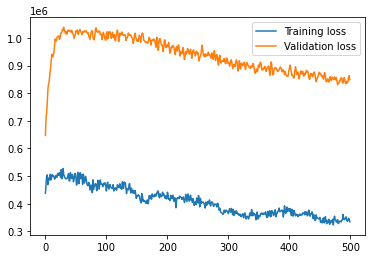

In [81]:
# fit model
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [82]:
# demonstrate prediction
x_test_scaled = dataset[-(n_steps_out+n_steps_in):-n_steps_out]
print(x_test_scaled)
x_test_scaled = x_test_scaled.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_test_scaled, verbose=0)
print(yhat)

[[0.19940868 0.20252952 0.29516055 ... 0.39687823 1.54012951 0.22414441]
 [0.21158379 0.20645395 0.30114212 ... 0.62565062 2.51018054 0.55780805]
 [0.25608766 0.24391593 0.36907415 ... 0.59789517 2.38610806 0.39009885]
 ...
 [0.37512038 0.34286911 0.42992231 ... 0.7405342  1.0993287  0.38700633]
 [0.28964867 0.27203361 0.31547104 ... 0.55690654 1.09062576 0.36427905]
 [0.37237919 0.34448221 0.42569258 ... 0.79619109 1.25332278 0.55546484]]
[[[0.32167327 0.2967602  0.34147733 ... 0.789797   1.5018106  0.6898142 ]
  [0.36916387 0.33875683 0.3879845  ... 0.8775994  1.6572398  0.7505411 ]
  [0.38256544 0.34923342 0.40308285 ... 0.888762   1.6507659  0.73369706]
  ...
  [0.4118432  0.34136438 0.41735554 ... 0.9357611  1.4244382  0.6611331 ]
  [0.41521913 0.34165052 0.41863447 ... 0.9324986  1.3902617  0.6578481 ]
  [0.41842812 0.34192264 0.4198503  ... 0.92939776 1.3577763  0.65472573]]]


In [83]:
yhat = yhat.reshape(yhat.shape[1],yhat.shape[2])
print(yhat)
# y_test = scaler.inverse_transform(yhat)
print(yhat)
print(dataset[-n_steps_out:])

[[0.32167327 0.2967602  0.34147733 ... 0.789797   1.5018106  0.6898142 ]
 [0.36916387 0.33875683 0.3879845  ... 0.8775994  1.6572398  0.7505411 ]
 [0.38256544 0.34923342 0.40308285 ... 0.888762   1.6507659  0.73369706]
 ...
 [0.4118432  0.34136438 0.41735554 ... 0.9357611  1.4244382  0.6611331 ]
 [0.41521913 0.34165052 0.41863447 ... 0.9324986  1.3902617  0.6578481 ]
 [0.41842812 0.34192264 0.4198503  ... 0.92939776 1.3577763  0.65472573]]
[[0.32167327 0.2967602  0.34147733 ... 0.789797   1.5018106  0.6898142 ]
 [0.36916387 0.33875683 0.3879845  ... 0.8775994  1.6572398  0.7505411 ]
 [0.38256544 0.34923342 0.40308285 ... 0.888762   1.6507659  0.73369706]
 ...
 [0.4118432  0.34136438 0.41735554 ... 0.9357611  1.4244382  0.6611331 ]
 [0.41521913 0.34165052 0.41863447 ... 0.9324986  1.3902617  0.6578481 ]
 [0.41842812 0.34192264 0.4198503  ... 0.92939776 1.3577763  0.65472573]]
[[0.39812233 0.37206137 0.43753179 ... 0.97550461 1.64160132 0.67047578]
 [0.3626103  0.31876718 0.40187582 ... 

In [84]:
import math
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(yhat,dataset[-n_steps_out:])
print(mape)

91.17855854771327


In [85]:
x_input_scaled = dataset[-n_steps_in:]
print(x_input_scaled)
x_input_scaled = x_input_scaled.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input_scaled, verbose=0)
print(yhat)

[[0.24112035 0.21626987 0.32411527 ... 1.12460705 2.12180164 0.74896713]
 [0.26463583 0.23384112 0.33724036 ... 1.29014463 2.54480154 0.85426393]
 [0.25328632 0.2454324  0.32881964 ... 0.91927311 2.19357749 0.71403381]
 ...
 [0.37375369 0.34499689 0.40026859 ... 1.20782415 1.77394841 0.81705893]
 [0.3336417  0.30050302 0.36040647 ... 1.1479989  1.64021404 0.75481252]
 [0.24217588 0.21514682 0.33592286 ... 0.76868481 1.48927726 0.54231719]]
[[[0.33738723 0.3080175  0.35263312 ... 0.8210426  1.5802507  0.72892505]
  [0.40918347 0.36887115 0.41791046 ... 0.95880735 1.8545866  0.8481622 ]
  [0.4217725  0.37874633 0.4321081  ... 0.96940446 1.8487684  0.8325107 ]
  ...
  [0.49083063 0.4348647  0.49800223 ... 1.1498815  1.7565211  0.82200396]
  [0.49402723 0.43513292 0.4992122  ... 1.1467867  1.7241287  0.8188921 ]
  [0.49706337 0.43538564 0.50036067 ... 1.1438427  1.6933397  0.8159354 ]]]


In [86]:
yhat = yhat.reshape(yhat.shape[1],yhat.shape[2])
# y_pred = scaler.inverse_transform(yhat)
print(yhat)

[[0.33738723 0.3080175  0.35263312 ... 0.8210426  1.5802507  0.72892505]
 [0.40918347 0.36887115 0.41791046 ... 0.95880735 1.8545866  0.8481622 ]
 [0.4217725  0.37874633 0.4321081  ... 0.96940446 1.8487684  0.8325107 ]
 ...
 [0.49083063 0.4348647  0.49800223 ... 1.1498815  1.7565211  0.82200396]
 [0.49402723 0.43513292 0.4992122  ... 1.1467867  1.7241287  0.8188921 ]
 [0.49706337 0.43538564 0.50036067 ... 1.1438427  1.6933397  0.8159354 ]]


In [87]:
print(yhat.shape)

(15, 3915)


In [80]:
output = pd.DataFrame(yhat)
output.to_csv('submission_LSTM_new.csv')
print("Your submission was successfully saved!")

Your submission was successfully saved!
